### Text Classification

In [1]:
%matplotlib inline

import pandas as pd

In [2]:
wine_df = pd.read_csv('/Users/nealcaren/Documents/GitHub/UiOBigData/draft/data/wine_reviews.csv')

In [3]:
wine_df['points'].value_counts()

87     16933
86     12600
91     11359
92      9613
85      9530
93      6489
84      6480
94      3758
83      3025
82      1836
95      1535
81       692
96       523
80       397
97       229
98        77
99        33
100       19
Name: points, dtype: int64

In [4]:
wine_df['description'][:5]

0    Aromas include tropical fruit, broom, brimston...
1    This is ripe and fruity, a wine that is smooth...
2    Tart and snappy, the flavors of lime flesh and...
3    Pineapple rind, lemon pith and orange blossom ...
4    Much like the regular bottling from 2012, this...
Name: description, dtype: object

![google_search.png](images/google_search.png)

In [5]:
pd.set_option('display.max_colwidth', 120)



In [6]:
wine_df['description'][:5]

0    Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripen...
1    This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red be...
2    Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity...
3    Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of ...
4    Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal ...
Name: description, dtype: object

In [7]:
wine_df.sample(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,rating
68799,US,"Bright aromas and vibrant fruit flavors combine for a very energized, beautifully balanced wine that will shine at t...",NaN,91,35.0,California,Anderson Valley,NaN,Jim Gordon,@gordone_cellars,Carpe Diem 2014 Pinot Noir (Anderson Valley),Pinot Noir,Carpe Diem,High
54408,Argentina,Aromas of briary berries mixed with tomato leaf set up a compact bumpy palate. Saucy herbal tomatoey berry flavors a...,Finca Lalande,87,16.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Domaine Bousquet 2015 Finca Lalande Cabernet Sauvignon (Mendoza),Cabernet Sauvignon,Domaine Bousquet,Low
15716,US,"Dark mauve in color, nearly approaching a red-wine tone, this shows a fruit-forward nose of red cherries and strawbe...",Pedregal Vineyard Rose of,86,23.0,California,San Benito County,Central Coast,Matt Kettmann,@mattkettmann,Manzoni 2014 Pedregal Vineyard Rose of Pinot Noir (San Benito County),Pinot Noir,Manzoni,Low
12816,US,"Not much going on with this dry, crisp Chardonnay. It has watery flavors of citrus fruits and apricots, with a hint ...",NaN,83,20.0,California,Sonoma County,Sonoma,NaN,NaN,Simple Math Cellars 2008 Chardonnay (Sonoma County),Chardonnay,Simple Math Cellars,Low
33990,Chile,"The Carmenère in this Carm-Cabernet-Syrah blend is the lead singer, so expect a touch of minty green and herbal esse...",Rivalta Limited Selection,91,68.0,Cachapoal Valley,NaN,NaN,Michael Schachner,@wineschach,Santa Ema 2005 Rivalta Limited Selection Red (Cachapoal Valley),Red Blend,Santa Ema,High


### Turning words in to features

In [8]:
from sklearn.feature_extraction.text import CountVectorizer


# 1. Set up your model, fixing any parameters.

In [9]:
vectorizer = CountVectorizer(lowercase   = True,
                             ngram_range = (1,1),
                             stop_words  = 'english',
                             min_df      = .01,
                             max_features = None)

# 2. Train your model

`model.fit(X)`

In [10]:
vectorizer.fit(wine_df['description'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=0.01,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

# Inpsect your model

In [11]:
len(vectorizer.get_feature_names())

400

# 3. Create new data based on your model

In [12]:
review_word_counts = vectorizer.transform(wine_df['description'])




What words are associated with well-reviewed wines?

In [13]:
wine_df['rating'].value_counts()

Low     51493
High    33635
Name: rating, dtype: int64

# 1. Set up your model, fixing any parameters.

In [14]:
from sklearn.naive_bayes import MultinomialNB

In [15]:
nb_classifier = MultinomialNB()

# 2. Fit your model

`model.fit(X)`

`model.fit(X, Y)`

In [16]:
nb_classifier.fit(review_word_counts, wine_df['rating'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## We have coefficients now

In [17]:
nb_classifier.coef_[0]

array([ -7.33467081,  -7.24590289,  -7.19142933,  -7.20616256,
        -7.38885524,  -8.18761044,  -8.89070795, -11.09798286,
        -7.20061213,  -7.24397425,  -6.69237287,  -4.00593826,
        -6.70465667,  -7.24397425,  -7.25950854,  -6.263145  ,
        -6.67477066,  -6.92639671,  -6.56148092,  -6.14471991,
        -6.39337878,  -6.09342661,  -7.16437628,  -4.84345499,
        -6.96645929,  -6.27185332,  -7.04067957,  -3.78998822,
        -6.93484747,  -6.76128647,  -5.86105745,  -7.28728811,
        -6.39585097,  -7.30147274,  -6.26459113,  -5.88949074,
        -6.73083916,  -7.12085331,  -8.99606846,  -9.17839002,
        -6.77928336,  -4.62605818,  -6.80255446,  -7.28127003,
        -6.45534174,  -5.38365017,  -5.85864374,  -4.66095875,
        -6.82131674,  -5.29641393,  -6.28284647,  -5.05147071,
        -7.33256333,  -7.57162234,  -6.77807344,  -5.25233262,
        -6.4614902 ,  -7.22300113,  -7.28127003,  -6.99910314,
        -6.93202261,  -6.6704181 ,  -5.11679824,  -6.92

In [18]:
coeficients = pd.Series(nb_classifier.coef_[0],
                        index = vectorizer.get_feature_names())

In [19]:
coeficients.sort_values(ascending=True)[:20]

2022          -11.097983
beautifully    -9.178390
beautiful      -8.996068
2020           -8.890708
impressive     -8.733704
opulent        -8.667564
velvety        -8.297381
lovely         -8.264770
cellar         -8.248854
focused        -8.222879
potential      -8.187610
2019           -8.187610
tightly        -8.057799
producer       -7.875477
layered        -7.868257
purple         -7.868257
provide        -7.839886
develop        -7.822555
polished       -7.798785
vines          -7.792096
dtype: float64

<div class="alert alert-info">
<h3> Your turn</h3>
<p> Construct a model of UN speeches to distinquish between those before and after the collapse of the Soviet Union.</p>
</div>


In [20]:
un_df = pd.read_json('files/un-general-debates.json')
un_df.head(2)

,country_code,speech_text,speech_year
0,MDV,﻿It is indeed a pleasure for me and the members of my delegation to extend to Ambassador Garba our sincere congratul...,1989
1,FIN,"﻿\nMay I begin by congratulating you. Sir, on your election to the presidency of the General Assembly at its forty-f...",1989


In [21]:
un_df['post_soviet'] = un_df['speech_year'] > 1991
un_df['post_soviet'].mean()

0.5939789529772213

In [22]:
un_vectorizer = CountVectorizer(lowercase   = True,
                             ngram_range = (1,1),
                             stop_words  = 'english',
                             min_df      = .05,
                             max_features = None)


un_vectorizer.fit(un_df['speech_text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=0.05,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [23]:
print(len(un_vectorizer.get_feature_names()))



3342


In [24]:
un_tf = un_vectorizer.transform(un_df['speech_text'])

In [25]:
un_nb_classifier = MultinomialNB()

un_nb_classifier.fit(un_tf, un_df['post_soviet'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
coeficients = pd.Series(un_nb_classifier.coef_[0],
                        index = un_vectorizer.get_feature_names())
coeficients.sort_values(ascending=True)[:20]

connexion   -15.260692
waldheim    -14.162080
kurt        -14.162080
kampuchea   -14.162080
131         -13.874398
104         -13.651254
129         -13.651254
119         -13.651254
contadora   -13.651254
435         -13.651254
127         -13.468933
101         -13.468933
174         -13.468933
rhodesia    -13.314782
121         -13.314782
112         -13.181250
123         -13.181250
111         -13.181250
138         -13.063467
115         -13.063467
dtype: float64

## Let's make some predictions

In [27]:
nb_classifier.fit(review_word_counts, wine_df['rating'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
nb_classifier.predict(review_word_counts)

array(['Low', 'High', 'Low', ..., 'Low', 'High', 'High'], dtype='<U4')

In [29]:
nb_classifier.fit(review_word_counts, wine_df['rating'])



wine_df['prediction']  = nb_classifier.predict(review_word_counts)

In [30]:
pd.crosstab(wine_df['rating'], wine_df['prediction'])

prediction,High,Low
rating,,
High,26996,6639
Low,7884,43609


In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [32]:
accuracy_score(wine_df['rating'], wine_df['prediction'])

0.8293980828869467

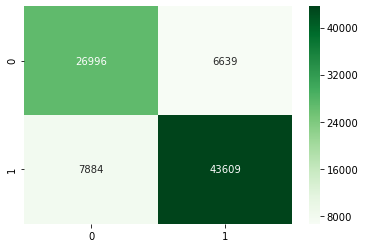

In [33]:
import seaborn as sns

cm = confusion_matrix(wine_df['rating'], wine_df['prediction'])
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')


In [34]:
print(classification_report(wine_df['rating'], wine_df['prediction']))

              precision    recall  f1-score   support

        High       0.77      0.80      0.79     33635
         Low       0.87      0.85      0.86     51493

    accuracy                           0.83     85128
   macro avg       0.82      0.82      0.82     85128
weighted avg       0.83      0.83      0.83     85128



Precision: % of selected items that are correct 

Recall: % of correct items that are selected



<div class="alert alert-info">
<h3> Your turn</h3>
<p> How's your UN model doing? How many correct? Is it balanced?</div>



In [35]:
un_df['post_soviet_guess'] = un_nb_classifier.predict(un_tf)

print(classification_report(un_df['post_soviet'], 
                            un_df['post_soviet_guess']))


              precision    recall  f1-score   support

       False       0.98      0.96      0.97      3048
        True       0.97      0.99      0.98      4459

    accuracy                           0.98      7507
   macro avg       0.98      0.97      0.97      7507
weighted avg       0.98      0.98      0.98      7507



In [36]:
print(accuracy_score(un_df['post_soviet'], 
                            un_df['post_soviet_guess']))

0.9757559611029706


In [37]:
nb_classifier.fit(review_word_counts, wine_df['rating'])

nb_classifier.predict_proba(review_word_counts)

array([[0.05837039, 0.94162961],
       [0.8189896 , 0.1810104 ],
       [0.0073304 , 0.9926696 ],
       ...,
       [0.31987064, 0.68012936],
       [0.92064944, 0.07935056],
       [0.65113375, 0.34886625]])

In [38]:
predict_df = pd.DataFrame(nb_classifier.predict_proba(review_word_counts), 
                          columns=nb_classifier.classes_)

In [39]:
predict_df.head()

,High,Low
0,0.058370,0.941630
1,0.818990,0.181010
2,0.007330,0.992670
3,0.009965,0.990035
4,0.017779,0.982221


In [40]:
wine_df_prediction = pd.concat([wine_df, predict_df], axis = 1)

In [41]:
wine_df_prediction.sort_values('High', ascending=False)[['description','points','High']].head(15)

,description,points,High
79481,"From a beautifully exposed southwest facing vineyard with views of the Pyrenees, this is a serious and impressive wi...",96,1.0
67748,"Dark, rich mountain blueberry and blackberry form the core of this classically delicious Napa Valley wine from an es...",93,1.0
5129,"A blend of 28% Cabernet Franc, 23% Cabernet Sauvignon, 21% Malbec, 18% Petit Verdot and 10% Merlot, this is a big, b...",94,1.0
25463,"A blend of 28% Cabernet Franc, 23% Cabernet Sauvignon, 21% Malbec, 18% Petit Verdot and 10% Merlot, this is a big, b...",94,1.0
64570,"A superb wine from a great year, this is powerful and structured, with great acidity and solid, pronounced fruits. L...",96,1.0
49526,This Ferreirinha Douro Superior wine is made in exceptional years. The 2007 is the 16th vintage since 1960 (the prev...,97,1.0
58945,"A blend of 57% Cabernet Sauvignon, 14% Merlot, 13% Malbec, 11% Cabernet Franc and 5% Petit Verdot, this stunning, we...",93,1.0
3958,"This is an enormous Cabernet, as packed with intensity and power as anything in Napa Valley. The vineyard is Von Str...",95,1.0
5115,"A proprietary blend of 57% Merlot, 35% Cabernet Sauvignon and 8% Petit Verdot, all homegrown, this is dense and powe...",94,1.0
36344,"Mature dark-skinned berry, leather, underbrush and dark spice are some of the aromas that emerge on this fantastic r...",97,1.0


In [42]:
wine_df_prediction.sort_values('Low', ascending=False)[['description','points']].head(25)

,description,points
26592,"Lemon citrus, toast, white flowers—the lead on this wine is feminine and light and, as the name suggests, feels like...",84
39450,"Reasonably accurate on the nose for Leyda Sauvignon Blanc, but also a little pickled smelling. Feels chunky and a li...",85
63660,"Apple and mineral aromas are basic but clean, and the palate is fresh and lithe, with little to no extra weight. Fla...",86
16200,"Lively aromas of grapefruit, white flowers and mineral lead into a light, fruity but rather simple palate that offer...",86
30861,"Simple but solid apple and nectarine aromas are straight forward. This feels round and easy, without much acid-based...",86
21333,"Simple but solid apple and nectarine aromas are straight forward. This feels round and easy, without much acid-based...",86
52219,"Fruity on the nose, with a friendly mix of pineapple, apple, melon and powdered sugar aromas. Feels smooth and round...",87
43618,A medium-bodied Bordeaux blend with sweet aromas of cherry pie and a hint of fresh sage and tarragon. Simple and str...,85
66311,"Dry, mild, dusty berry aromas are simple but correct for the variety. This feels scattered across the palate, with s...",86
58458,"Slightly stalky, roasted aromas of earthy plum and berry lean in the direction of compost. This feels light and some...",87


<div class="alert alert-info">
<h3> Your turn</h3>
  <p> Which <b>post 1989</b> speech had the highest likelihood of being delivered during an earlier period?

</div>



In [43]:
un_predict_df = pd.DataFrame(un_nb_classifier.predict_proba(un_tf), 
                          columns=['pred_pre','pred_post'])

un_df_prediction = pd.concat([un_df, un_predict_df], axis = 1)

un_df_prediction[un_df_prediction['post_soviet']==True].sort_values('pred_post')

,country_code,speech_text,speech_year,post_soviet,post_soviet_guess,pred_pre,pred_post
5580,PRK,"On behalf of the delegation of the Democratic\nPeople’s Republic of Korea, I should like, first of all, to\ncongratu...",1993,True,False,1.000000e+00,3.141851e-95
6353,PRK,"On behalf of the delegation of the \nDemocratic People's Republic of Korea, I would like to congratulate you, \nMr. ...",1992,True,False,1.000000e+00,1.539919e-90
6202,CUB,I wish \nto congratulate Mr. Ganev on his election to the presidency of the General \nAssembly at this session. He c...,1992,True,False,1.000000e+00,1.829508e-62
7266,NIC,I should like to begin by remembering the \nmillions of human beings who are the victims of the \npolicies of coloni...,2007,True,False,1.000000e+00,2.049954e-54
6788,PRK,"Mr. President, allow me first of all, on behalf\nof the Democratic People’s Republic of Korea, to convey\nto you our...",1994,True,False,1.000000e+00,8.598637e-41
3635,PRK,"At the outset, please allow me to express, on\nbehalf of the delegation of the Democratic People's\nRepublic of Kore...",1999,True,False,1.000000e+00,2.590976e-38
1830,PRK,"﻿Allow me first of all, on behalf of the\ndelegation of the Democratic People’s Republic of Korea,\nto congratulate ...",1997,True,False,1.000000e+00,6.803213e-33
1149,PRK,"﻿I would like to\ncongratulate you, Sir, on your election as President of\nthe General Assembly at its fifty-seventh...",2002,True,False,1.000000e+00,2.933563e-30
6234,VNM,"On \nbehalf of the delegation of Viet Nam, permit me at the outset to extend my \nwarmest congratulations to His Exc...",1992,True,False,1.000000e+00,6.514479e-30
2576,PRK,"On behalf of the delegation of the\nDemocratic People’s Republic of Korea, I should like first\nto congratulate you,...",1995,True,False,1.000000e+00,9.504932e-28


In [44]:
un_df_prediction[un_df_prediction['post_soviet']==False].sort_values('pred_pre')

,country_code,speech_text,speech_year,post_soviet,post_soviet_guess,pred_pre,pred_post
822,CAN,"﻿I know that you, Sir, will convey to the President of the General Assembly at the forty-sixth session my congratula...",1991,False,True,4.171855e-114,1.000000e+00
65,NOR,"﻿It is a great pleasure, Mr. President, to congratulate you upon your election as President of this session of the G...",1989,False,True,1.216317e-84,1.000000e+00
811,JPN,﻿I should like first to extend my heartfelt congratulations to His Excellency Mr. Samir Shihabi upon his election as...,1991,False,True,1.672033e-73,1.000000e+00
141,NZL,﻿\nIt is a great pleasure to see a distinguished leader such as Ambassador Garba presiding over this Assembly. We ha...,1989,False,True,1.051915e-69,1.000000e+00
796,DNK,﻿We are today In the happy position of being able to give a warm welcome to the representatives of the three Baltic ...,1991,False,True,5.386032e-66,1.000000e+00
898,BGD,"﻿I stand before this Assembly with a sense of pride and humility - pride, because I represent a Government freely el...",1991,False,True,6.228746e-61,1.000000e+00
857,PER,"﻿At a stage of unprecedented significance for the international system, I should like to congratulate Mr. Shihabi on...",1991,False,True,1.397509e-55,1.000000e+00
773,AUS,"﻿I congratulate you, Sir, on your election as President of the forty-sixth session of the General Assembly. I am sur...",1991,False,True,2.521340e-55,1.000000e+00
883,NOR,"﻿It is indeed a pleasure to congratulate you, Mr. President, upon your election to this high office at a time of suc...",1991,False,True,4.566214e-52,1.000000e+00
750,LBR,﻿It is indeed for me a great honour and privilege to address the forty-sixth session of the General Assembly. This o...,1991,False,True,1.643594e-49,1.000000e+00


### What about overfitting?

In [45]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(wine_df, test_size=0.2)

In [46]:
len(train)

68102

In [47]:
len(test)

17026

In [48]:
vectorizer = CountVectorizer(lowercase   = True,
                             ngram_range = (1,2),
                             stop_words  = 'english',
                             min_df      = .01,
                             max_features = None)

vectorizer.fit(train['description'])


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=0.01,
                ngram_range=(1, 2), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [49]:
X_train = vectorizer.transform(train['description'])

In [50]:
nb_classifier.fit(X_train, train['rating'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [52]:
print(accuracy_score(train['rating'],
                     nb_classifier.predict(X_train)))



0.827670259316907


In [53]:
test_wf         = vectorizer.transform(test['description'])
test_prediction = nb_classifier.predict(test_wf)

In [54]:
print(accuracy_score(test['rating'], test_prediction))

0.8255609068483496


In [55]:
vectorizer = CountVectorizer(lowercase=True,
                             ngram_range = (1,3),
                             stop_words = 'english',
                             max_df = .60,
                             min_df = 5,
                             max_features = None)

In [56]:
vectorizer.fit(train['description'])
print(len(vectorizer.get_feature_names()))
X_train = vectorizer.transform(train['description'])
nb_classifier.fit(X_train, train['rating'])


76783


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [57]:
print(accuracy_score(train['rating'],
                     nb_classifier.predict(X_train)))



0.9175795130833162


In [58]:
print(accuracy_score(test['rating'],
                     nb_classifier.predict(vectorizer.transform(test['description']))))


0.8865852226007283


<div class="alert alert-info">
<h3> Your turn</h3>
<p> What happens to your model if you change some of the parameters for your vectorizer? Be sure to spit the data between train and test!

</div>




# What about a different model?

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
ln_classifier = LogisticRegression()

In [61]:
vectorizer = CountVectorizer(lowercase=True,
                             ngram_range = (1,2),
                             stop_words = 'english',
                             min_df = .01,
                             max_features = None)

vectorizer.fit(train['description'])

print(len(vectorizer.get_feature_names()))
ln_classifier.fit(vectorizer.transform(train['description']), train['rating'])

459


/Users/nealcaren/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
print(accuracy_score(train['rating'],
                     ln_classifier.predict(vectorizer.transform(train['description']))))

0.8835570174150539


In [63]:
print(accuracy_score(test['rating'],
                     ln_classifier.predict(vectorizer.transform(test['description']))))

0.8783037707036297


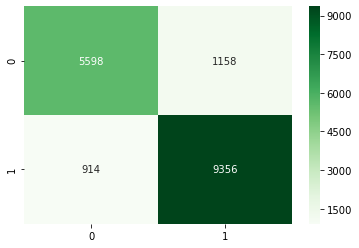

In [64]:
test_prediction = ln_classifier.predict(vectorizer.transform(test['description']))

cm = confusion_matrix(test['rating'], test_prediction)
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')



<div class="alert alert-info">
<h3> Your turn</h3>
What is the out sample accuracy of a logistic regression model on your data?
<p><code> from sklearn.linear_model import LogisticRegression

</div>





# What about a different model?

![](images/knn1.png)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_vector  = TfidfVectorizer(lowercase  =  True,
                             ngram_range = (1,2),
                             stop_words  = 'english',
                             max_df      = .60,
                             min_df      = .05,
                             max_features = None)

In [ ]:
train, test = train_test_split(wine_df, test_size=0.7)

In [ ]:
tf_vector.fit(train['description'])

In [ ]:
review_tf = tf_vector.transform(train['description'])

In [ ]:
knn_classifier.fit(review_tf, train['rating'])

In [ ]:
knn_prediction = knn_classifier.predict(review_tf)

In [ ]:

print(accuracy_score(train['rating'], knn_prediction))



In [ ]:
print(classification_report(train['rating'], knn_prediction))

In [ ]:
cm = confusion_matrix(train['rating'], knn_prediction)
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')


<div class="alert alert-info">
<h3> Your turn</h3>
<p> What does a k-nearest neigbhor for your speech dataset look like? (Don't forget to shrink your dataframe). How does the accuracy compare?
</div>





![](images/knn2.png)

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 15)

# But what's the best fitting model?

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# old model: knn_classifier = KNeighborsClassifier(n_neighbors = 3)

parameters = {'n_neighbors' : [2,3, 7],
              'weights'      : ['distance', 'uniform']}
              

In [ ]:
grid = GridSearchCV(KNeighborsClassifier(), 
                    parameters, 
                    cv = 5)

![](images/cv.png)


# But what's the best fitting model?

In [145]:
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [237]:
pipeline = Pipeline([
                     ('vectorizer' , CountVectorizer(stop_words = 'english')),
                     ('classifier' , LogisticRegression())
                    ])

parameters = {'vectorizer__min_df' : [.005, .01, .03 ],
              'vectorizer__ngram_range' : [(1, 1), (1,2)],
               }

In [238]:
grid_search = GridSearchCV(pipeline,
                           parameters,
                           n_jobs = -1,
                           cv = 5,
                           verbose = 2)

In [239]:
grid_search.fit(train['description'],
                train['rating'])

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.4min finished
/Users/nealcaren/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vectorizer',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                      

In [240]:
grid_search.best_score_

0.8974919972981704

In [241]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_vectorizer__min_df,param_vectorizer__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.163742,0.311600,1.058331,0.015168,0.005,"(1, 1)","{'vectorizer__min_df': 0.005, 'vectorizer__ngram_range': (1, 1)}",0.901109,0.892886,0.891858,0.900661,0.895587,0.896420,0.003846,2
1,12.855202,0.155015,1.730297,0.090375,0.005,"(1, 2)","{'vectorizer__min_df': 0.005, 'vectorizer__ngram_range': (1, 2)}",0.902063,0.893914,0.892445,0.900000,0.899038,0.897492,0.003684,1
2,5.735788,0.072384,1.143641,0.010138,0.01,"(1, 1)","{'vectorizer__min_df': 0.01, 'vectorizer__ngram_range': (1, 1)}",0.879377,0.873504,0.872623,0.879075,0.878846,0.876685,0.002975,4
3,12.428664,0.255436,1.706825,0.041142,0.01,"(1, 2)","{'vectorizer__min_df': 0.01, 'vectorizer__ngram_range': (1, 2)}",0.880993,0.874752,0.874385,0.880029,0.881049,0.878241,0.003023,3
4,4.834535,0.056363,1.088579,0.005323,0.03,"(1, 1)","{'vectorizer__min_df': 0.03, 'vectorizer__ngram_range': (1, 1)}",0.816827,0.810733,0.813743,0.814758,0.818783,0.814969,0.002738,6
5,11.298983,0.779417,1.361173,0.334868,0.03,"(1, 2)","{'vectorizer__min_df': 0.03, 'vectorizer__ngram_range': (1, 2)}",0.817488,0.812349,0.813890,0.815786,0.820251,0.815953,0.002761,5


In [242]:
best_estimator = grid_search.best_estimator_

best_estimator

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=0.005,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
    

In [243]:
accuracy_score(best_estimator.predict(test['description']),
               test['rating'])

0.8984494302830964

<div class="alert alert-info">
<h3> Homework</h3>
<p> The "data" folder contains board games descriptions scraped from BoardGameGeeks.com. Analyze the relationship between the words in the <code>description</code> and whether or not reviewers thought it was a <code>quality_game</code>. 
</div>




